## Loading Library

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

%pip install mlxtend==0.23.1

Note: you may need to restart the kernel to use updated packages.


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [119]:
#1
url = r'https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv'
df = pd.read_csv(url)
df.head()


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [120]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [121]:
#3 check missing values
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

4. The overview reveals a _________________________. (fill that blank on the section below)

the dataset has 5 attributes and 0 null values. The datatypes are int64 and objects.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

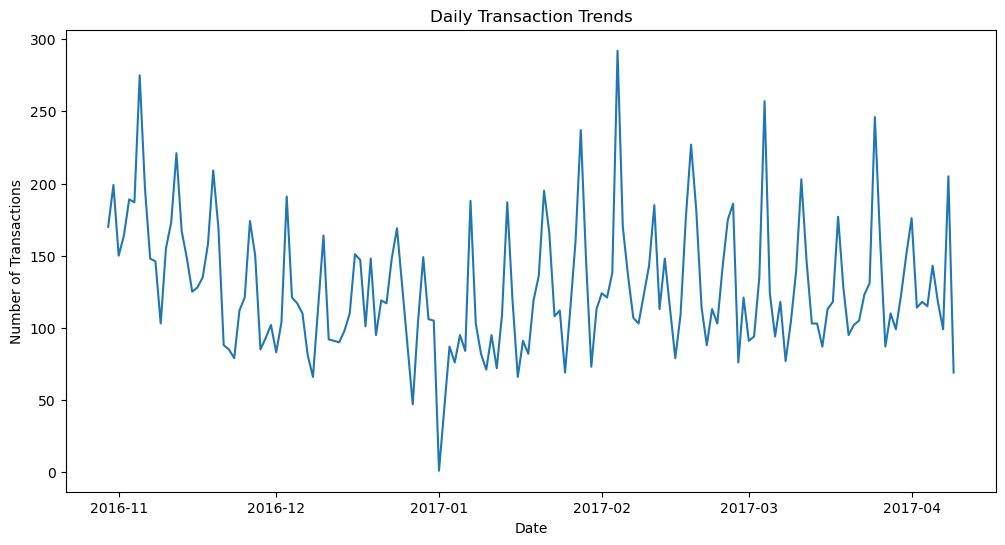

In [122]:
# 5
df["date_time"] = pd.to_datetime(df["date_time"], format = "%d-%m-%Y %H:%M")
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['hour'] = pd.to_datetime(df['date_time']).dt.hour

daily_transactions = df.groupby('date')['Transaction'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['date'], daily_transactions['Transaction'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [123]:
# 6
df['hour'] = df['date_time'].dt.hour            
df['time'] = df['date_time'].dt.time           
df['day'] = df['date_time'].dt.day              
df['day_name'] = df['date_time'].dt.day_name()  
df['month'] = df['date_time'].dt.month          
df['year'] = df['date_time'].dt.year           

df = df[['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend', 'day', 'month', 'year', 'time', 'hour', 'day_name']]
df.sample(n=5)


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
11644,5787,Coffee,2017-02-02 11:07:00,morning,weekday,2,2,2017,11:07:00,11,Thursday
13325,6515,Coffee,2017-02-13 13:13:00,afternoon,weekday,13,2,2017,13:13:00,13,Monday
7355,3714,Coffee,2016-12-23 10:42:00,morning,weekday,23,12,2016,10:42:00,10,Friday
16729,7952,Tea,2017-03-11 12:25:00,afternoon,weekend,11,3,2017,12:25:00,12,Saturday
2434,1178,Truffles,2016-11-12 15:00:00,afternoon,weekend,12,11,2016,15:00:00,15,Saturday



Alright, now I can easily create a visualization of monthly sales.

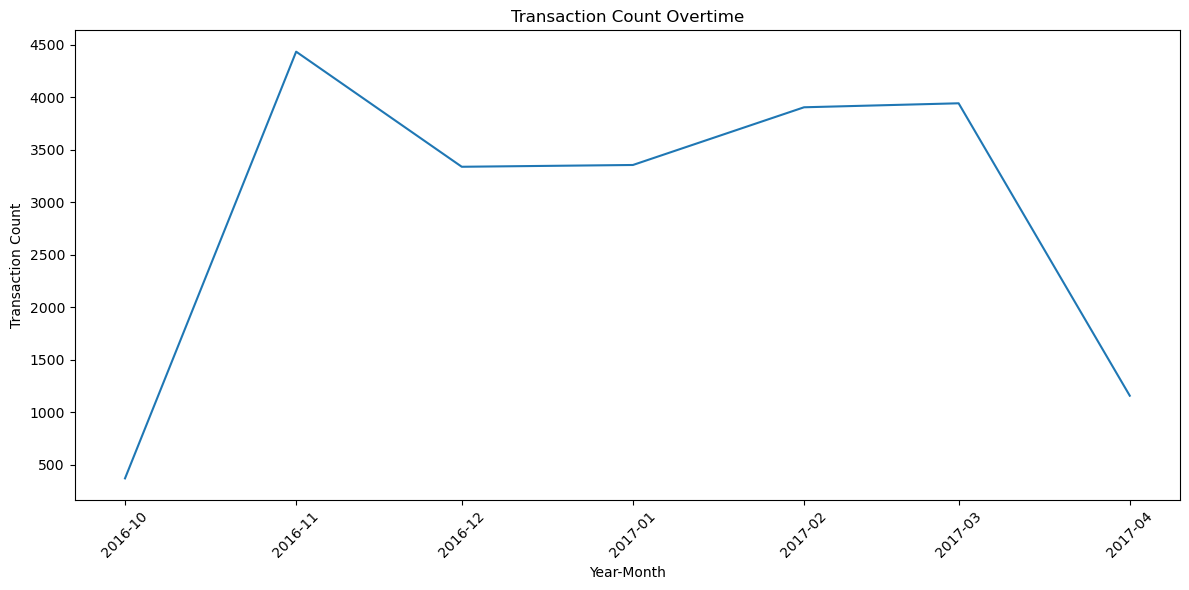

In [124]:
# 7
df['year_month'] = df['date_time'].dt.to_period('M')
monthly_sales = df.groupby('year_month')['Transaction'].count().reset_index(name='total_transactions')
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['total_transactions'])
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Count Overtime')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

1st visualization is too 'crowded' and the 2nd is way better visual wise

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [125]:
#9
df['weekday_weekend'] = df['date_time'].dt.dayofweek.apply(lambda x: 'weekday' if x < 5 else 'weekend')
df[['day_name', 'weekday_weekend']].drop_duplicates()
weekdays = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
weekends = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()
weekday_str = ', '.join(weekdays)
weekend_str = ', '.join(weekends)

# Display the results
print(f"Weekday: {weekday_str}")
print(f"Weekend: {weekend_str}")

Weekday: Monday, Tuesday, Wednesday, Thursday, Friday
Weekend: Sunday, Saturday



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [126]:
#10
transaction_counts = df.groupby(['month', 'day_name']).size().reset_index(name='total_transactions')
pivot_table = transaction_counts.pivot_table(index='month', columns='day_name', values='total_transactions', fill_value=0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(columns=day_order)
pivot_table

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

we can see the transactions per month and see the peak days


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

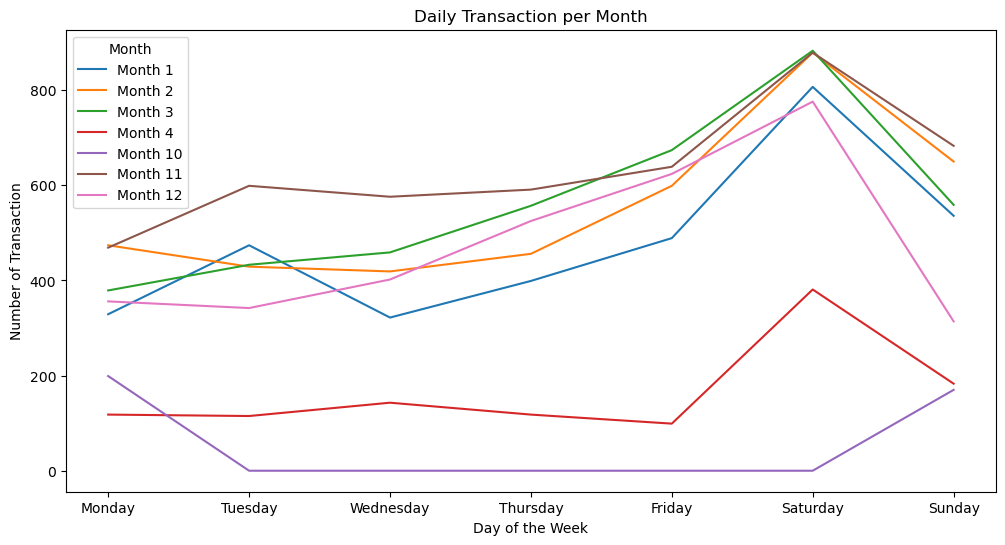

In [127]:
# 12
pivot_table = transaction_counts.pivot_table(index='day_name', columns='month', values='total_transactions', fill_value=0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_table = pivot_table.reindex(day_order)

plt.figure(figsize=(12, 6))
for month in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[month], label=f'Month {month}')

plt.title('Daily Transaction per Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transaction')
plt.legend(title='Month', labels=[f'Month {i}' for i in pivot_table.columns])
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

the peak day is saturday

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [128]:
# 14
unique_periods = df['period_day'].unique()
unique_periods

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [138]:
# 15
unique_hours_by_period = df.groupby('period_day')['hour'].unique()

for period, hours in unique_hours_by_period.items():
    print(f"Unique {period}_hour: {hours}")

Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique morning_hour: [ 9 10 11  8  7  1]
Unique night_hour: [21 23 22]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

why is 1 considered as morning? it should be nighttime. And usually morning is from 6 to 12


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

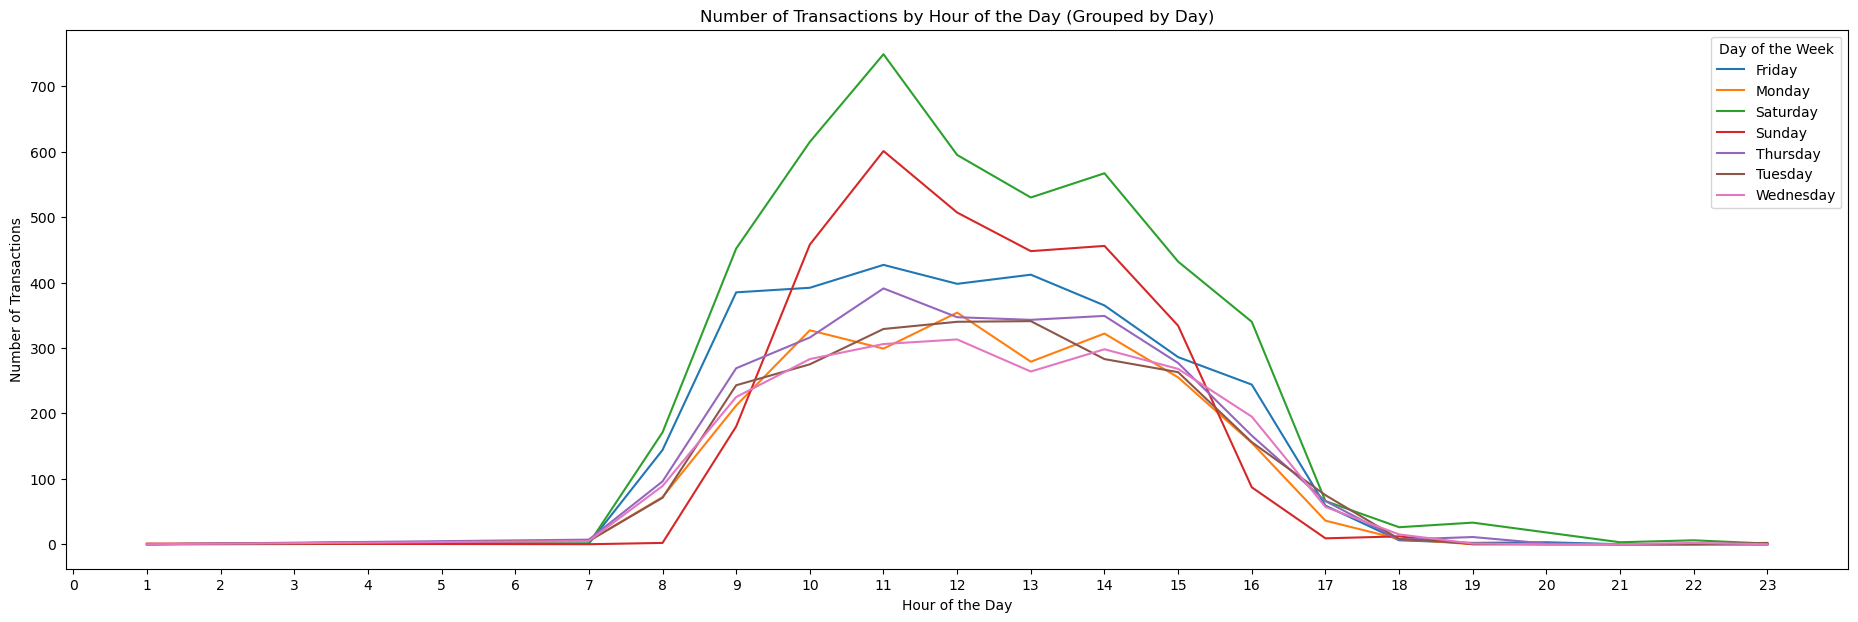

In [148]:
# 17
transaction_count_by_hour_day = df.groupby(['hour', 'day_name'])['Transaction'].count().unstack(fill_value=0)
plt.figure(figsize=(23, 7))

for day in transaction_count_by_hour_day.columns:
    plt.plot(transaction_count_by_hour_day.index, transaction_count_by_hour_day[day], label=day)

plt.title('Number of Transactions by Hour of the Day (Grouped by Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  
plt.legend(title='Day of the Week')
plt.show()

18. The daily sales trend plot reveals that _______

peak hour is 11 pm

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

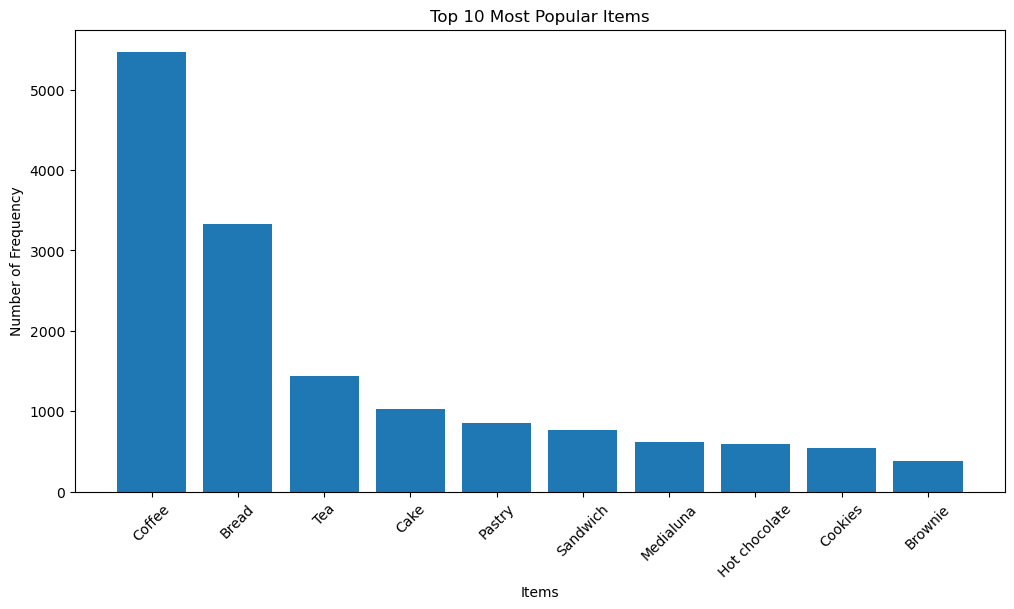

In [158]:
# 19
item_frequency = df['Item'].value_counts().reset_index()
item_frequency.columns = ['Item', 'Frequency']
plt.figure(figsize=(12, 6))
plt.bar(item_frequency['Item'][:10], item_frequency['Frequency'][:10])
plt.title('Top 10 Most Popular Items')
plt.xlabel('Items')
plt.ylabel('Number of Frequency')
plt.xticks(rotation=45)
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

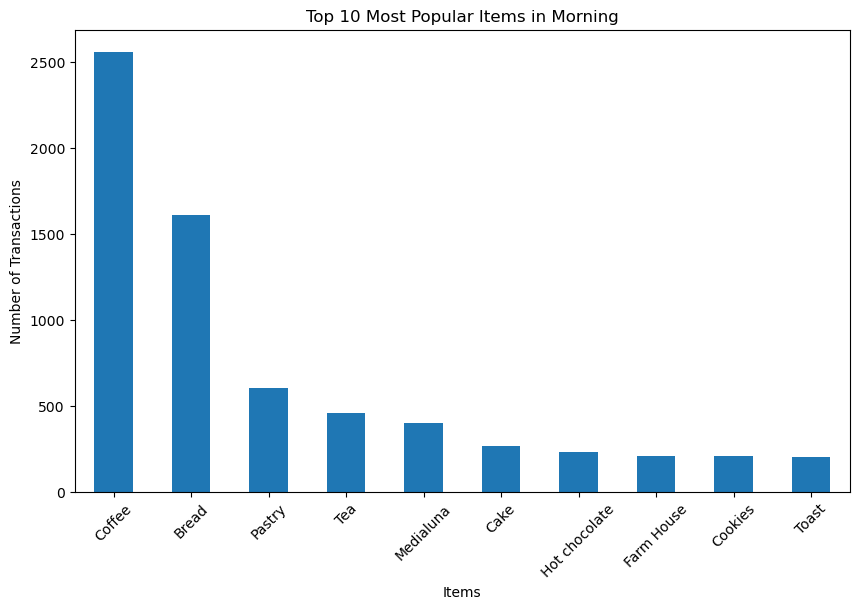

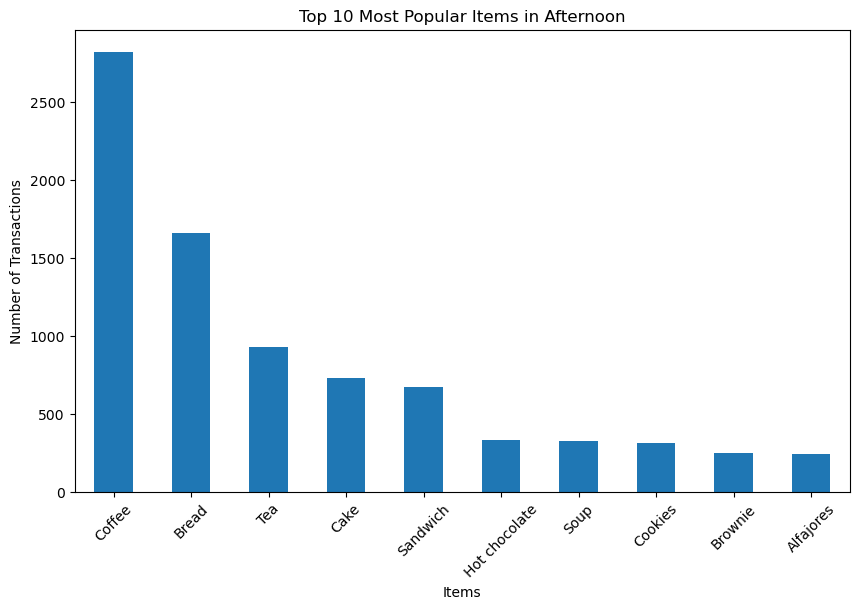

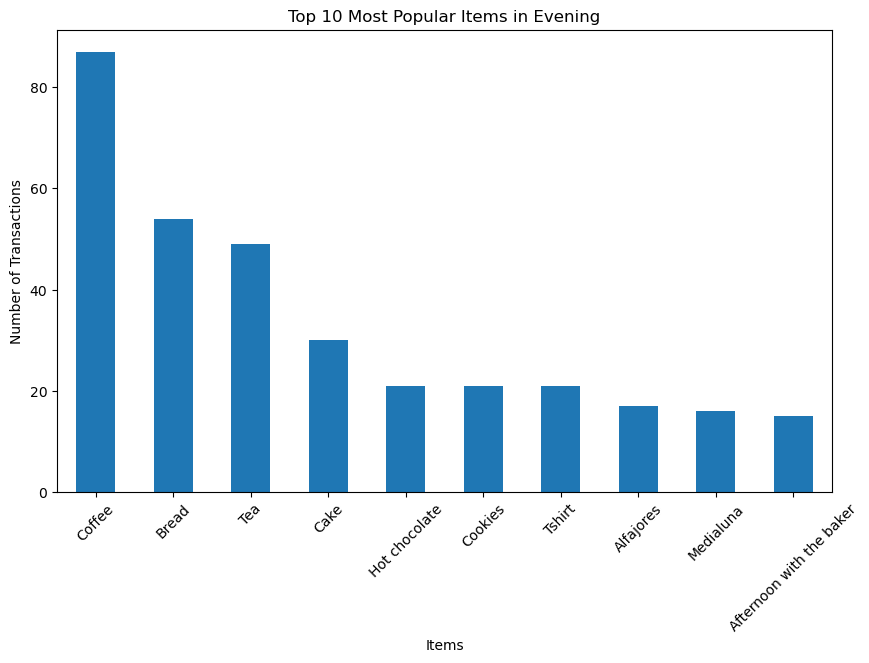

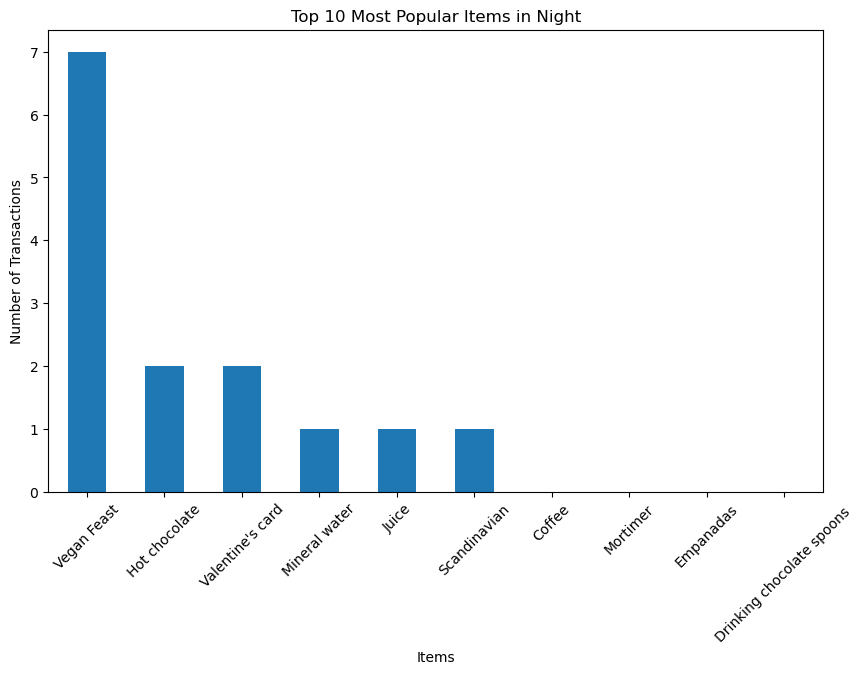

In [168]:
# 20
periods = ['morning', 'afternoon', 'evening', 'night']
item_popularity_by_period = df.groupby(['period_day', 'Item']).size().reset_index(name='Frequency')
pivot_item_popularity = item_popularity_by_period.pivot(index='Item', columns='period_day', values='Frequency').fillna(0)
pivot_item_popularity = pivot_item_popularity.sort_values(by=periods, ascending=False)

for period in periods:
    sorted_items = pivot_item_popularity[period].sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    sorted_items.plot(kind='bar')
    plt.xlabel('Items')
    plt.ylabel('Number of Transactions')
    plt.title(f'Top 10 Most Popular Items in {period.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

21. It turns out that there is something different in the plot above, the insight is ____


the most popular items varies depending on the time of the day

I found a valentine card, I was curious about when people bought it so I made a visualization of it

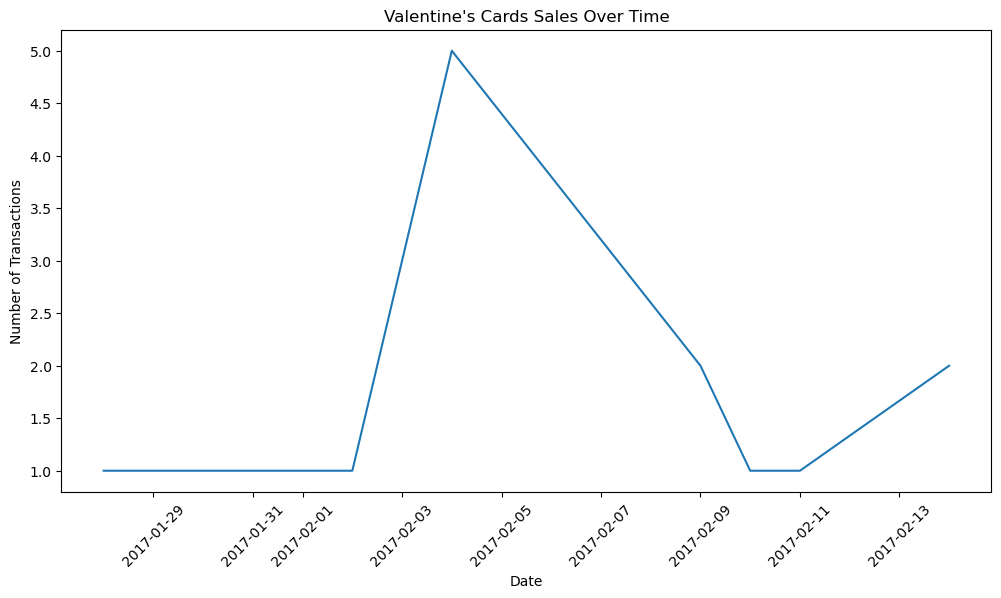

In [172]:
#22
valentine_card = df[df['Item'].str.contains('Valentine', case=False, na=False)]

# Group by date and count the number of transactions
valentine_transactions = valentine_card.groupby(valentine_card['date_time'].dt.date).size().reset_index(name='Number of Transactions')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(valentine_transactions['date_time'], valentine_transactions['Number of Transactions'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title("Valentine's Cards Sales Over Time")
plt.xticks(rotation=45)
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


mostly sold at february

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [188]:
# 24
df['Quantity'] = df.groupby(['Transaction', 'Item'])['Item'].transform('count')
df = df.drop_duplicates(subset=['Transaction', 'Item'])
transaction_data = df.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)
display(transaction_data.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
# 25
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)
display(transaction_data.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
#25
# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)
display(transaction_data.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [190]:
# 26
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets


c:\Users\Belinda\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [191]:
# 27
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules


c:\Users\Belinda\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



1. Well-liked Individual Products:

Bread, coffee, and cake are among the items that frequently appear in transactions with high support values (e.g., Bread, with a support of 0.327). This suggests that people really like these products and often buy them on their own.

2. Regular Pairings of Items:

Additionally, the system found common item pairs including Coffee and Tea (support of 0.049868) and Cake and Bread (support of 0.023349). These pairings imply that consumers are likely to buy both of these products when they buy one, suggesting that they are complementary and could be promoted together.

3. Threshold of Support:

With support levels over the 0.02 criterion, the itemsets found are present in at least 2% of all transactions. This indicates that these products, either separately or in combination, are not only well-liked but also account for a large portion of all sales.

4. Business Perspectives:

The results can direct inventory and marketing plans. For instance, given their frequent co-occurrence, products like coffee and pastry (support of 0.047544) could be marketed as a pair.
Bread, cake, and coffee are high-support commodities that should be given priority when it comes to stocking or special offers.

5. Prospects for the Future:

To find more uncommon but important pairings, extra analysis can be done by modifying the min_support threshold or by investigating association rules with other metrics, such as lift. This might provide even more detailed information about the tastes and actions of customers.
All things considered, the regular itemset analysis offers helpful insights into which individual items and item pairs are frequently purchased together, providing important data for more effective inventory management and targeted marketing activities.
